In [1]:
# Preliminaries 
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from scipy import linalg

from nilearn import datasets
from nilearn.input_data import NiftiMasker

from nilearn.image import smooth_img
import numpy as np
#import cv2

import keras

Using TensorFlow backend.


In [2]:
# download oasis dataset on working directory 
oasis_dataset = datasets.fetch_oasis_vbm(n_subjects= 416)

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\nilearn\datasets\struct.py:307: UserWarning: Only 403 subjects are available in the DARTEL-normalized version of the dataset. All of them will be used instead of the wanted 416
  % n_subjects)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2266: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [5]:
#gm_imgs = np.array(oasis.gray_matter_maps)
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
gm_imgs = gray_matter_map_filenames

In [6]:
# create binary label by clinical dimentia rating (CDR)    
cdr = oasis_dataset.ext_vars['cdr'].astype(float)
cdr_numpy_arr = np.array(cdr)
for i in range(len(cdr_numpy_arr)):
    if(np.isnan(cdr_numpy_arr[i])): cdr_numpy_arr[i] = 1
    
    elif(cdr_numpy_arr[i] > 0.0): cdr_numpy_arr[i] = 1

In [3]:
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
rng = check_random_state(42)


In [7]:
gm_imgs_train, gm_imgs_test, cdr_train, cdr_test = train_test_split(
    gm_imgs, cdr_numpy_arr, train_size=.7, random_state=rng)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


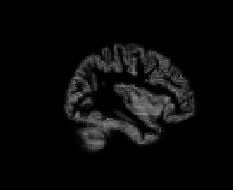

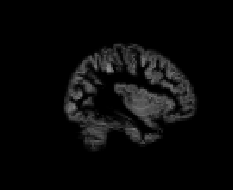

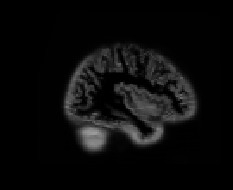

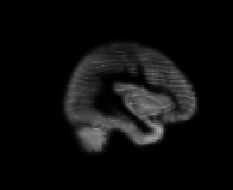

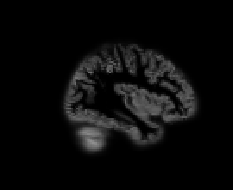

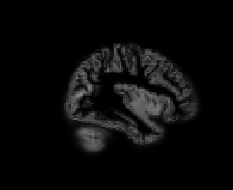

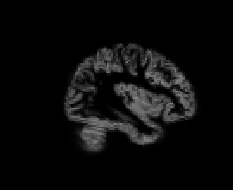

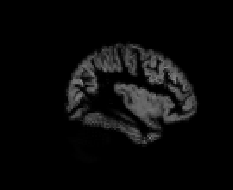

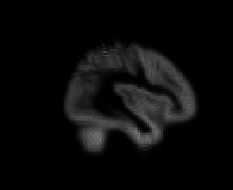

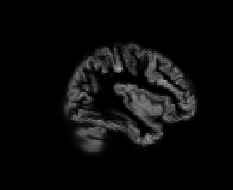

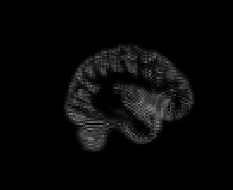

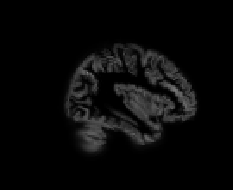

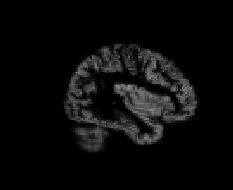

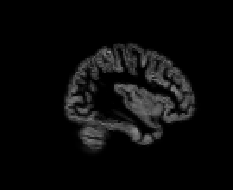

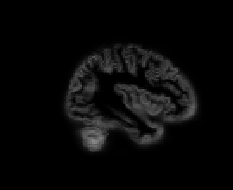

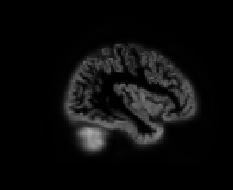

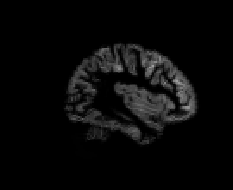

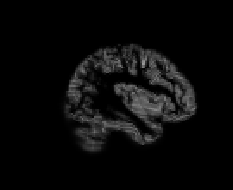

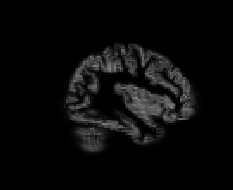

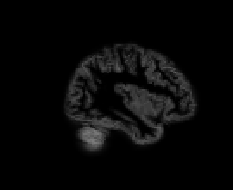

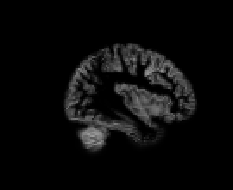

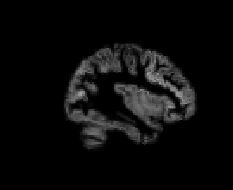

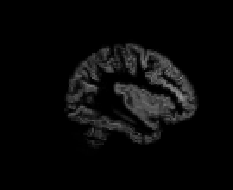

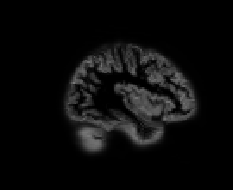

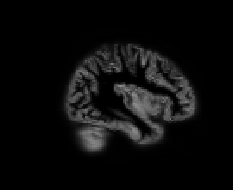

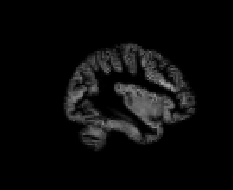

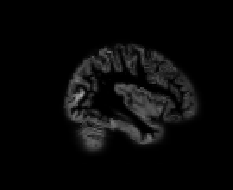

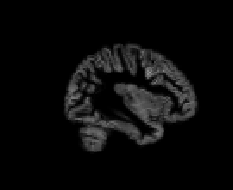

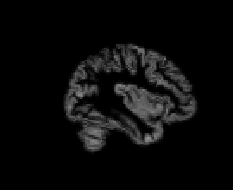

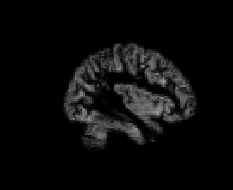

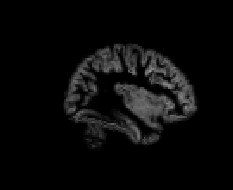

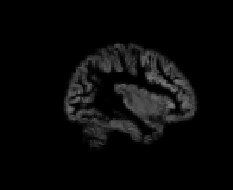

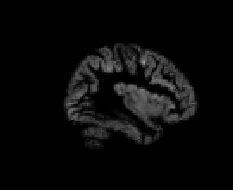

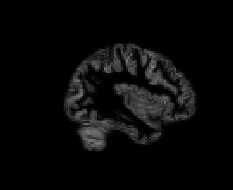

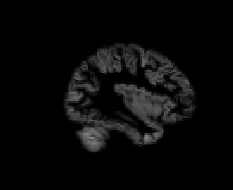

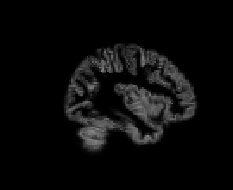

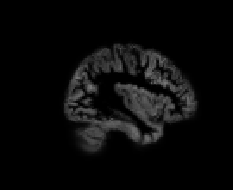

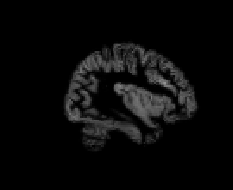

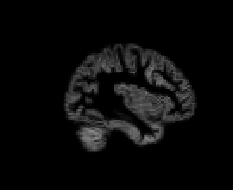

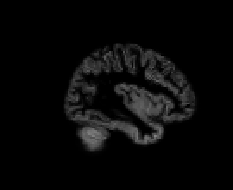

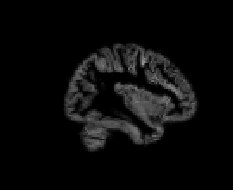

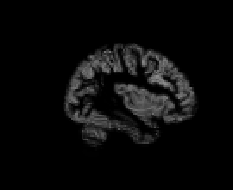

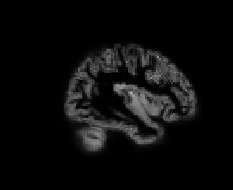

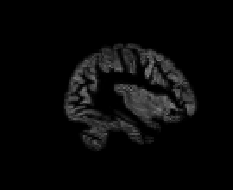

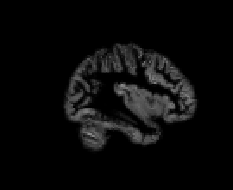

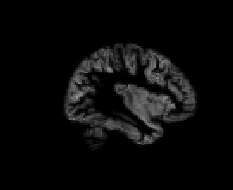

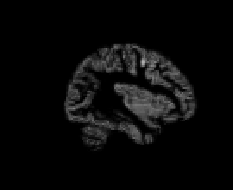

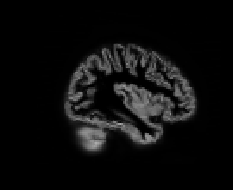

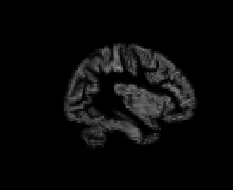

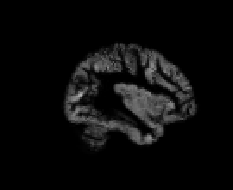

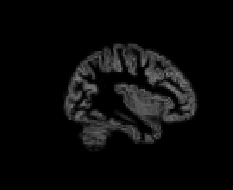

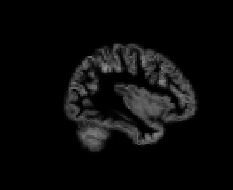

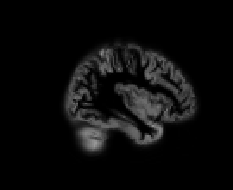

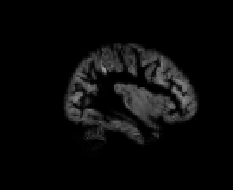

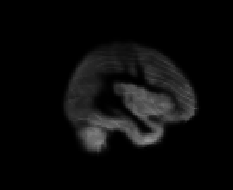

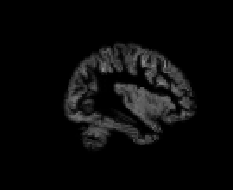

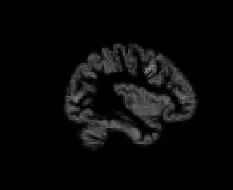

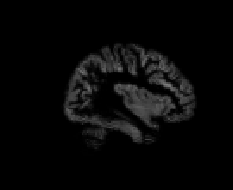

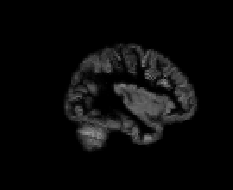

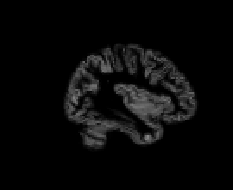

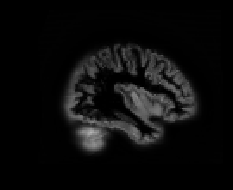

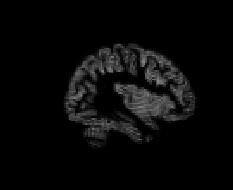

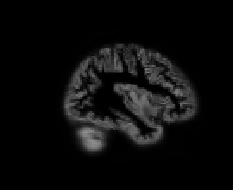

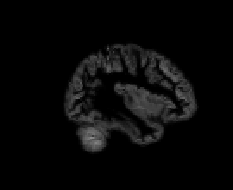

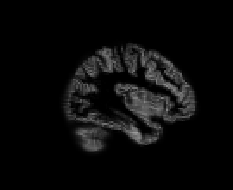

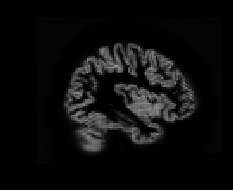

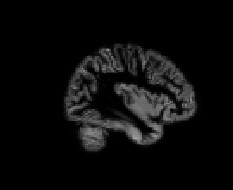

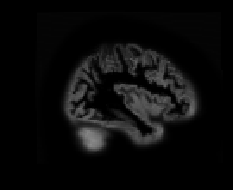

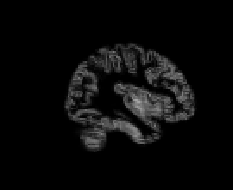

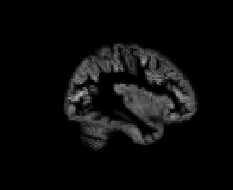

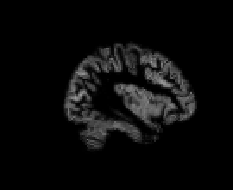

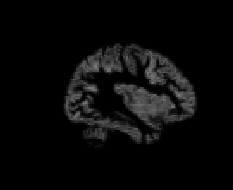

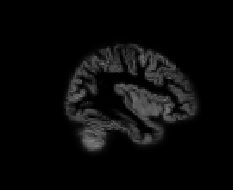

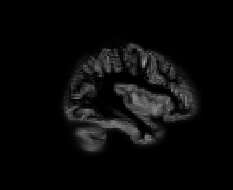

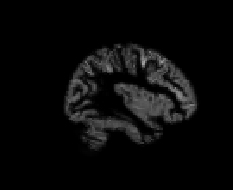

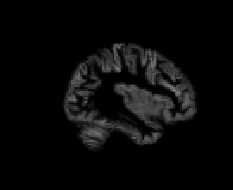

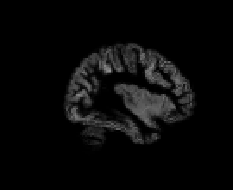

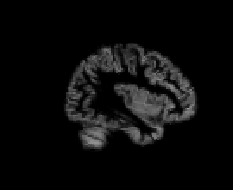

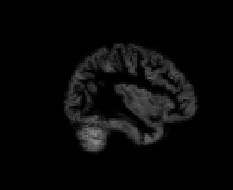

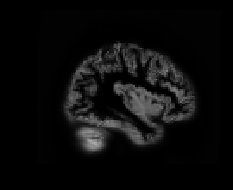

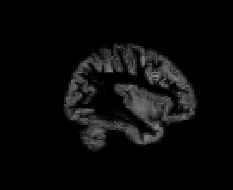

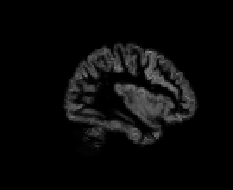

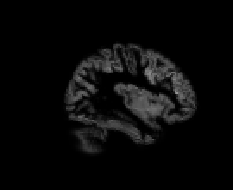

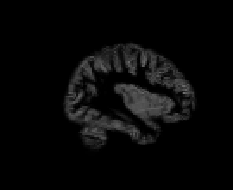

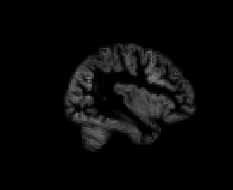

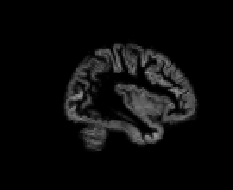

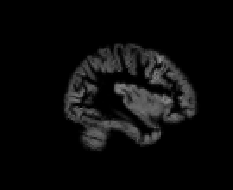

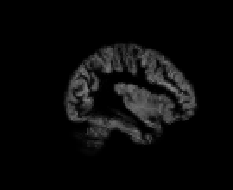

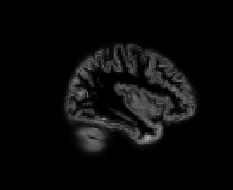

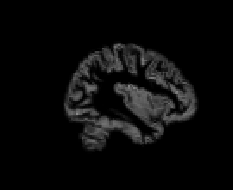

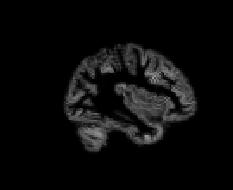

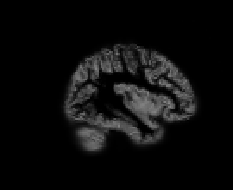

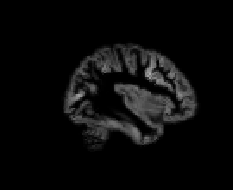

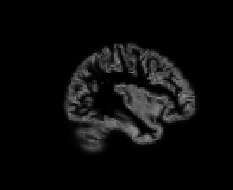

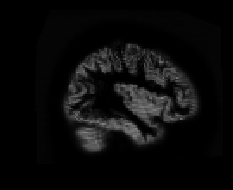

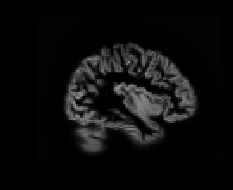

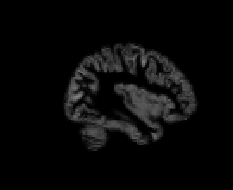

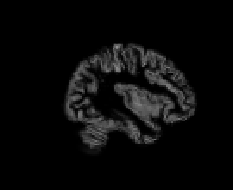

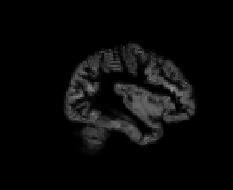

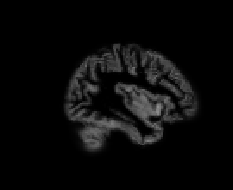

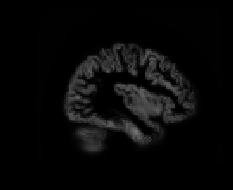

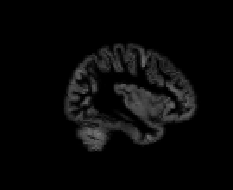

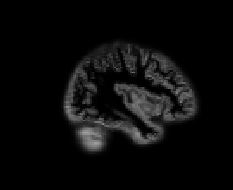

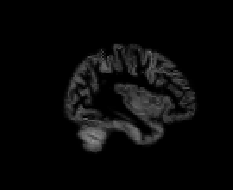

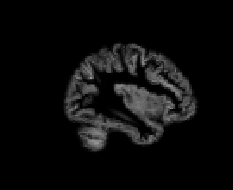

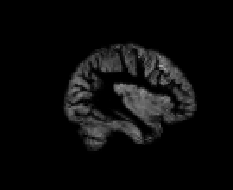

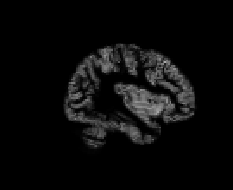

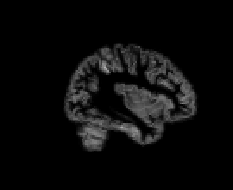

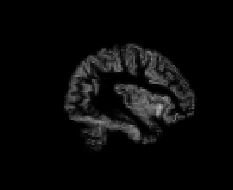

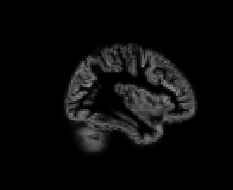

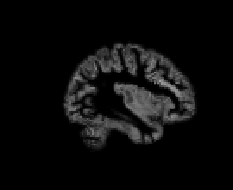

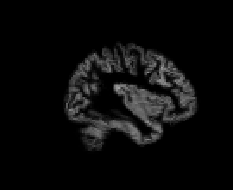

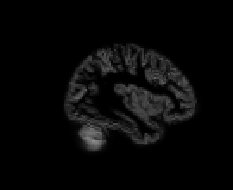

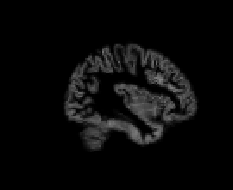

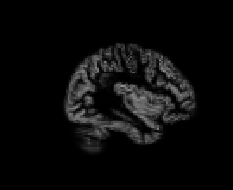

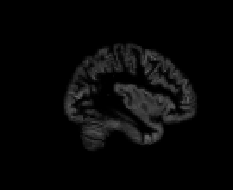

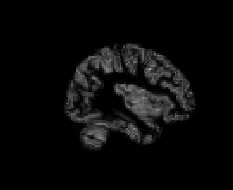

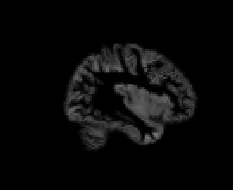

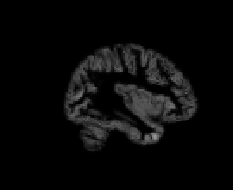

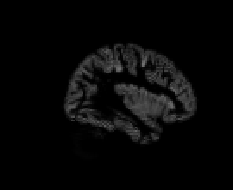

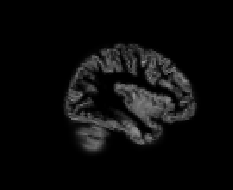

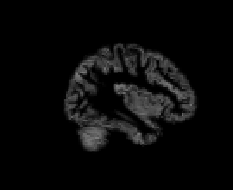

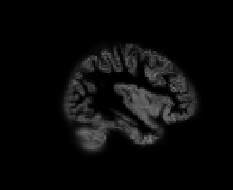

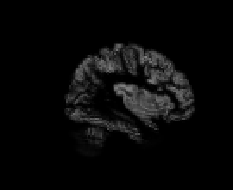

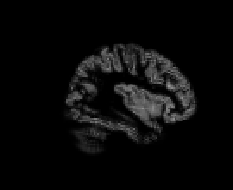

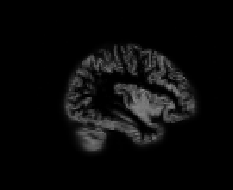

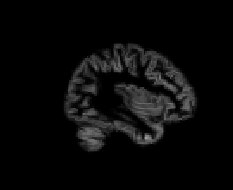

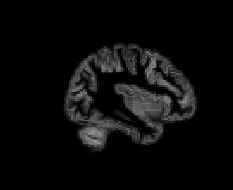

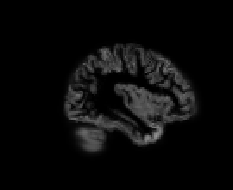

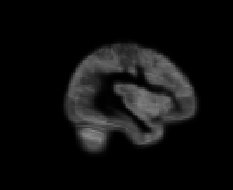

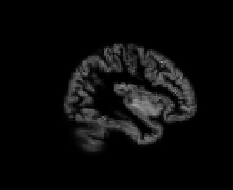

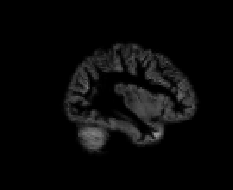

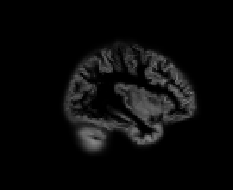

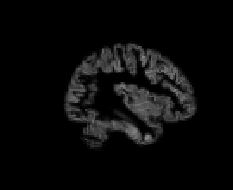

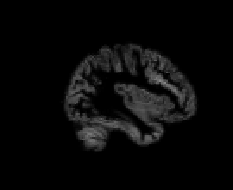

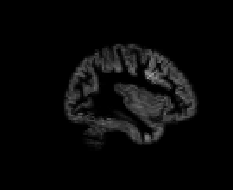

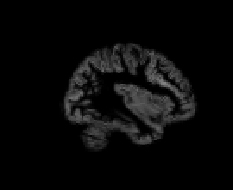

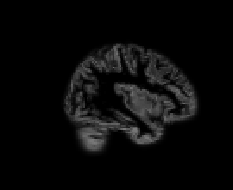

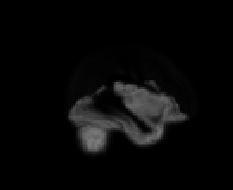

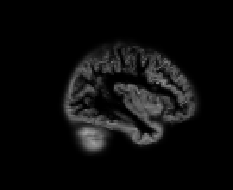

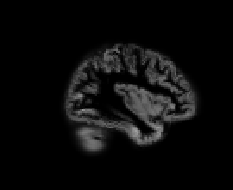

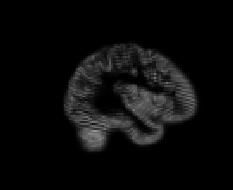

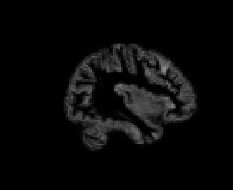

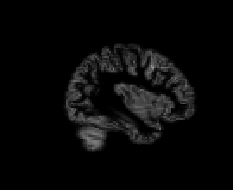

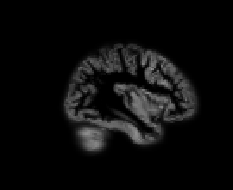

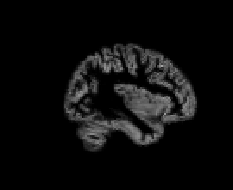

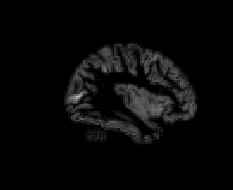

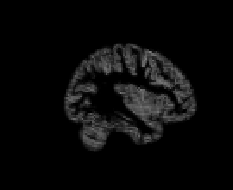

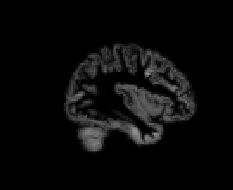

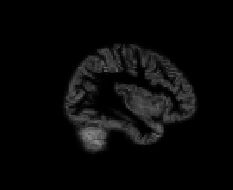

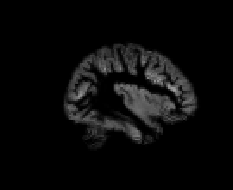

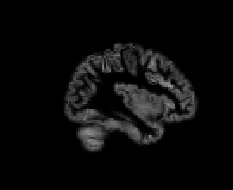

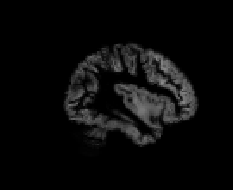

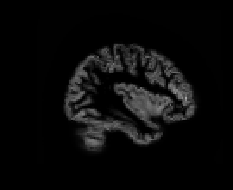

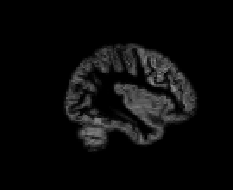

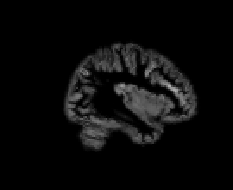

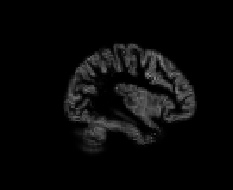

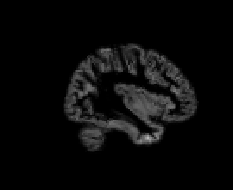

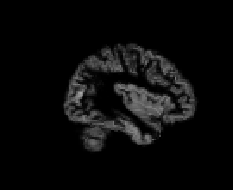

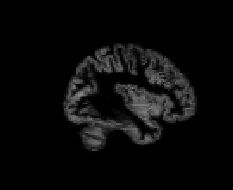

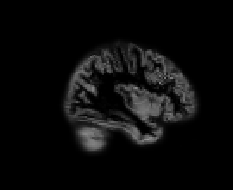

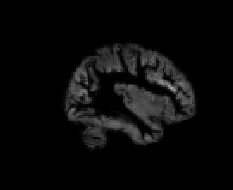

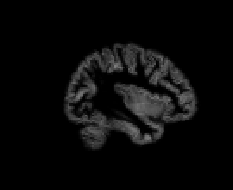

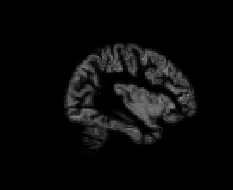

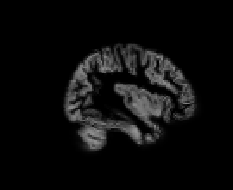

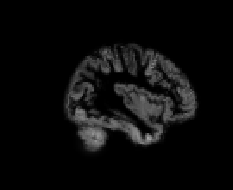

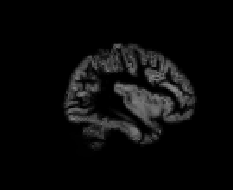

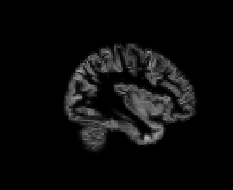

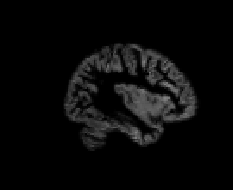

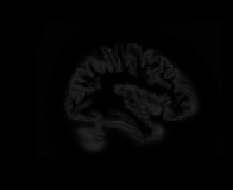

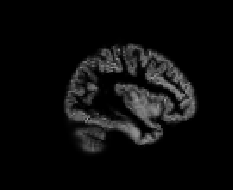

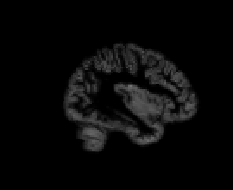

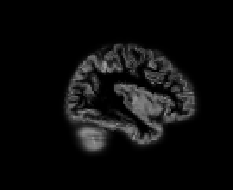

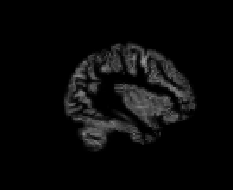

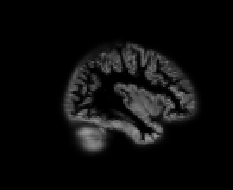

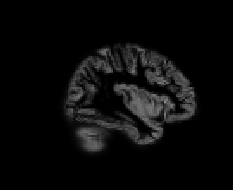

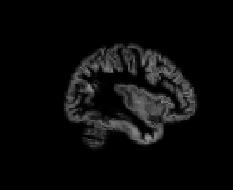

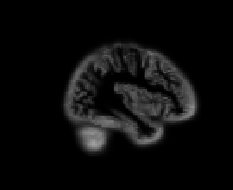

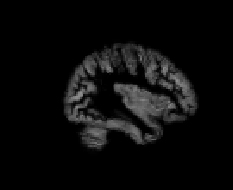

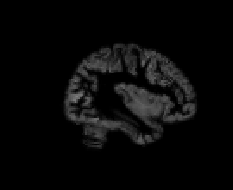

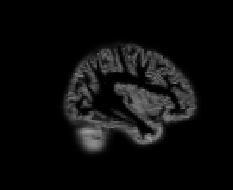

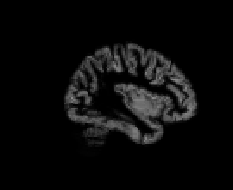

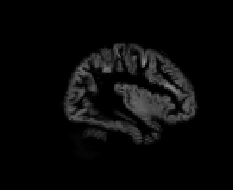

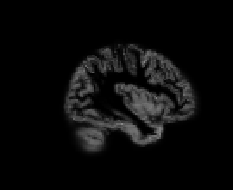

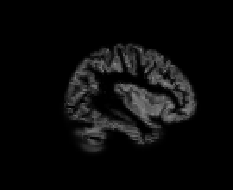

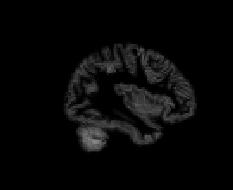

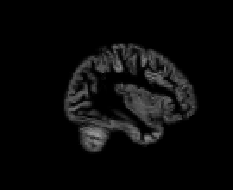

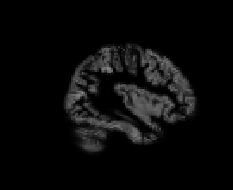

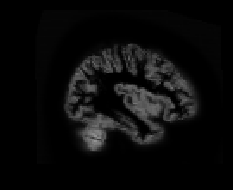

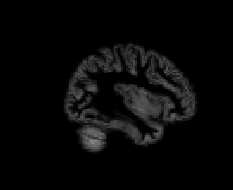

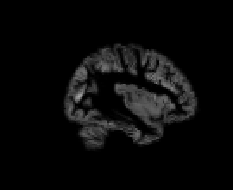

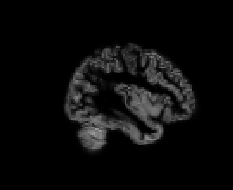

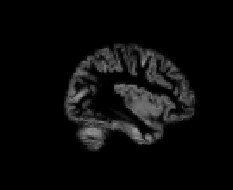

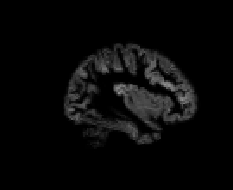

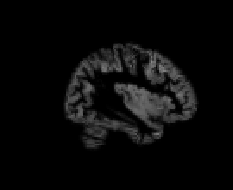

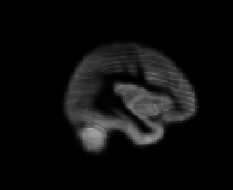

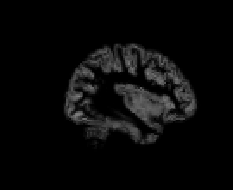

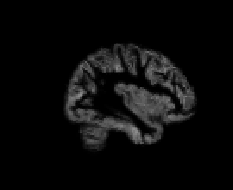

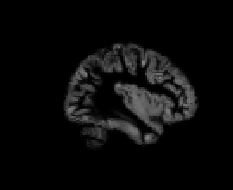

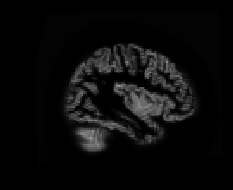

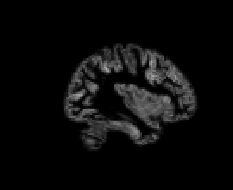

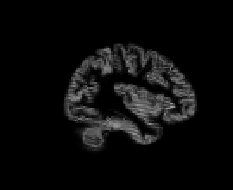

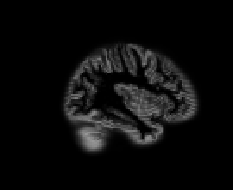

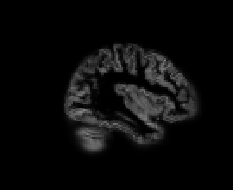

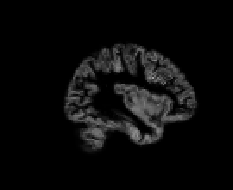

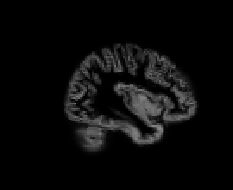

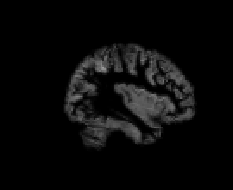

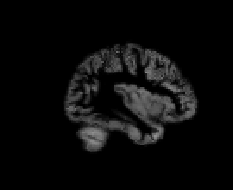

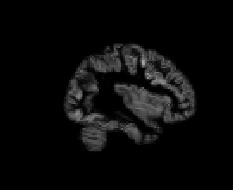

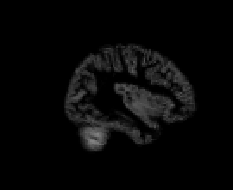

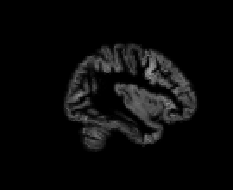

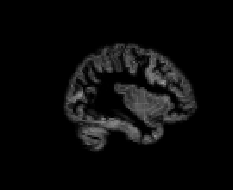

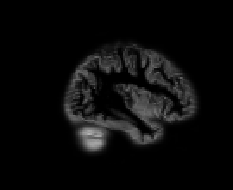

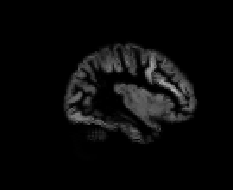

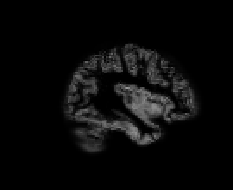

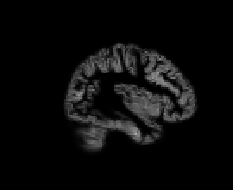

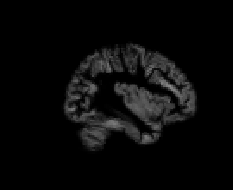

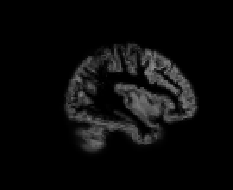

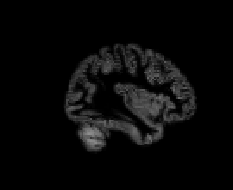

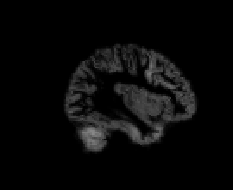

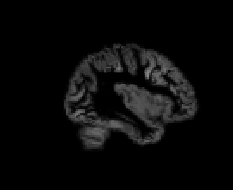

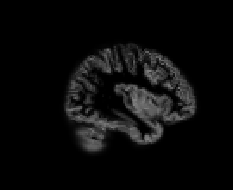

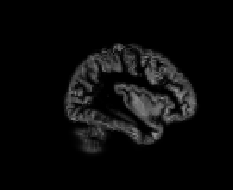

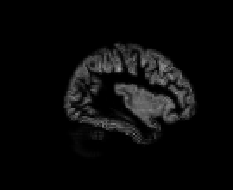

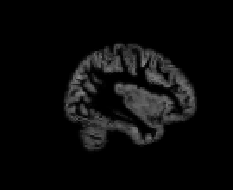

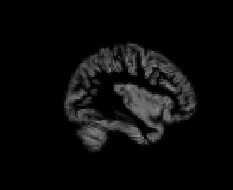

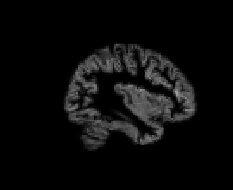

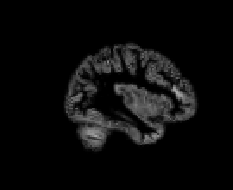

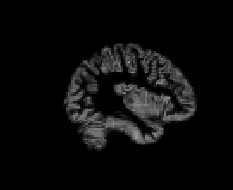

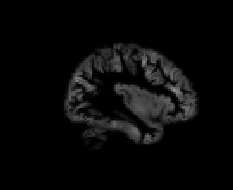

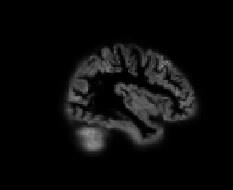

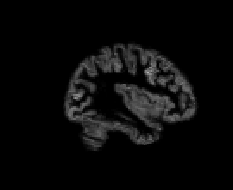

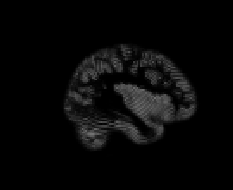

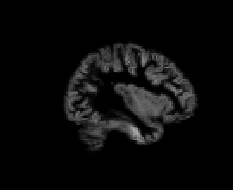

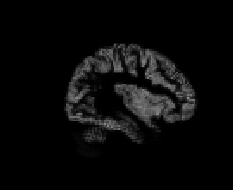

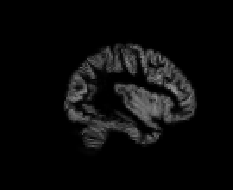

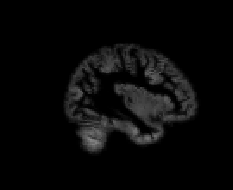

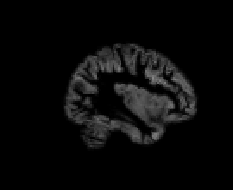

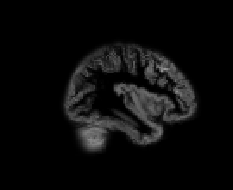

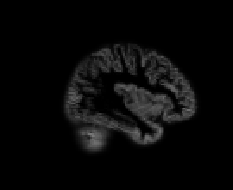

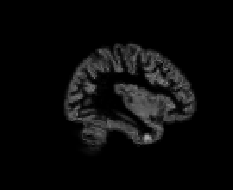

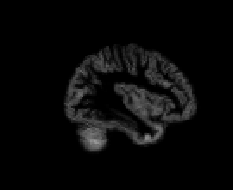

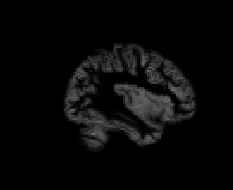

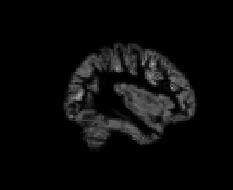

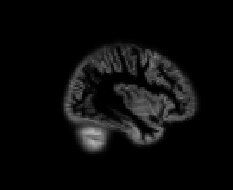

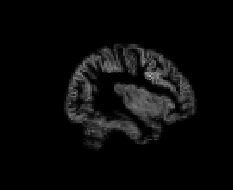

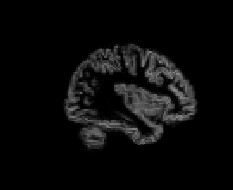

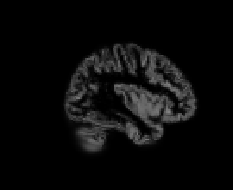

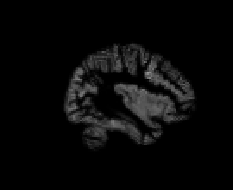

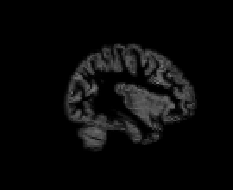

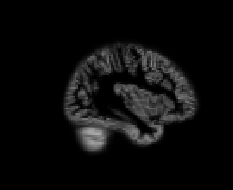

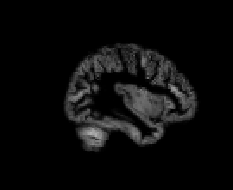

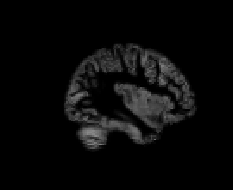

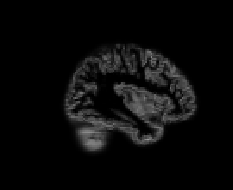

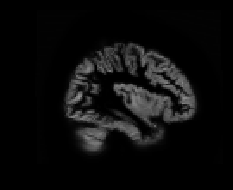

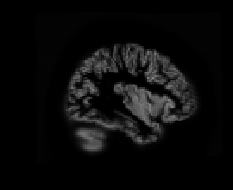

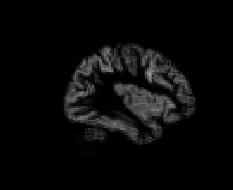

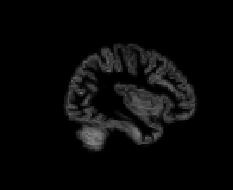

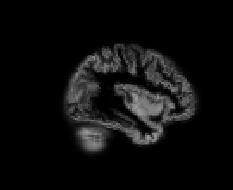

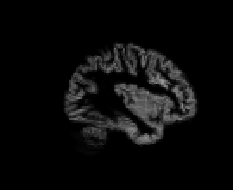

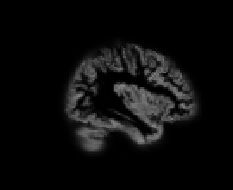

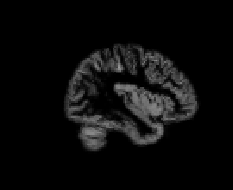

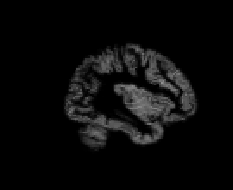

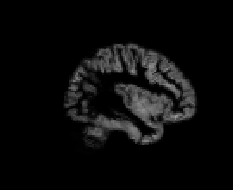

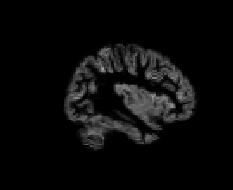

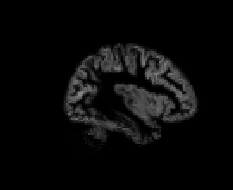

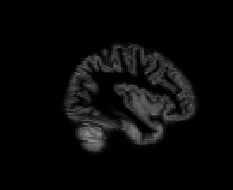

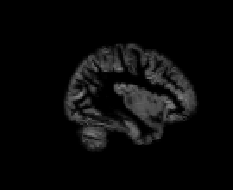

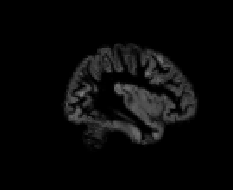

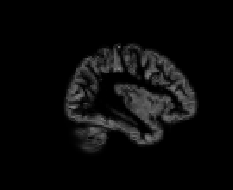

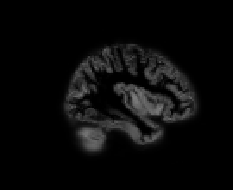

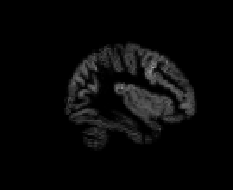

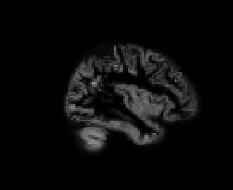

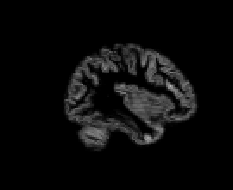

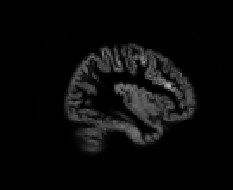

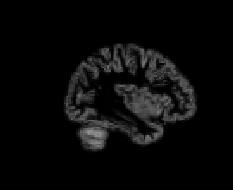

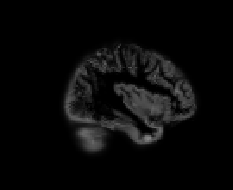

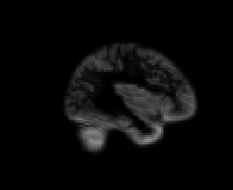

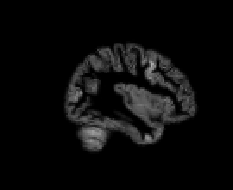

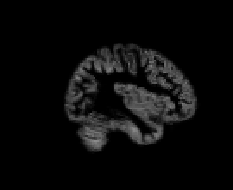

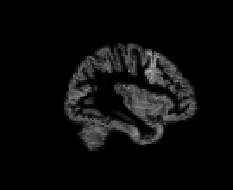

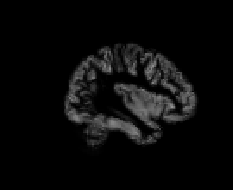

In [9]:
from nilearn import image
from nilearn import plotting 
# extract images at specific MNI coordinates and save in specified location         
i = 0
for image in gm_imgs_train:
    fig = plotting.plot_anat(image, display_mode = 'x', annotate= False, cut_coords = [40])
    if cdr_train[i] == 0:
        fig.savefig('C:\\Users\\user\\Neural Networks\\NiDataTrain\\not_impaired\\' + 'brain' + str(i) + '.png')
    elif cdr_train[i] == 1:
        fig.savefig('C:\\Users\\user\\Neural Networks\\NiDataTrain\\impaired\\' + 'brain' + str(i) + '.png')
    i = i + 1

In [11]:
import os
os.getcwd()

'C:\\Users\\user\\Neural Networks'

In [12]:
## Create location for test images to be saved 
try:
    os.makedirs("C:\\Users\\user\\Neural Networks\\NiDataTest\\not_impaired")
except OSError:
    print("error")
try:
    os.makedirs("C:\\Users\\user\\Neural Networks\\NiDataTest\\impaired")
except OSError:
    print("error")


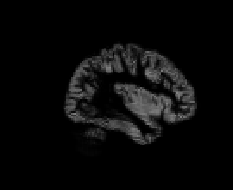

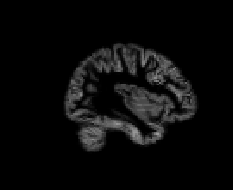

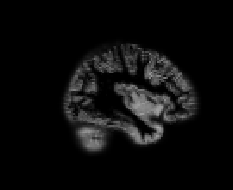

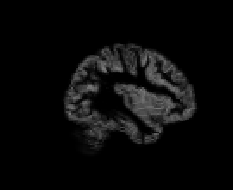

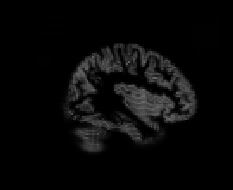

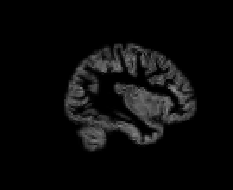

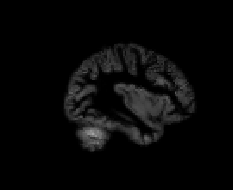

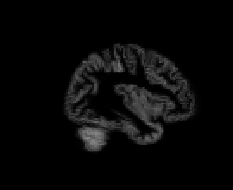

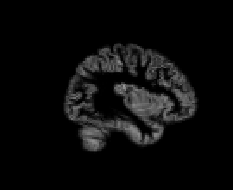

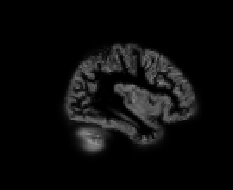

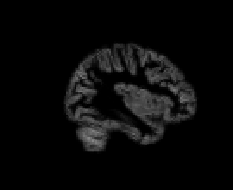

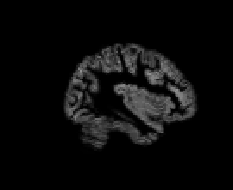

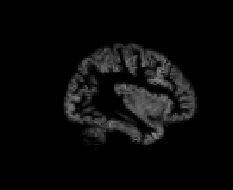

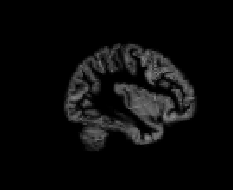

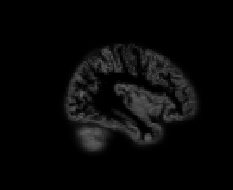

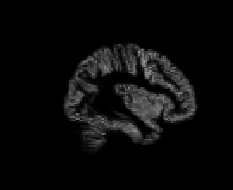

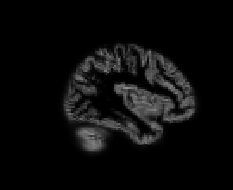

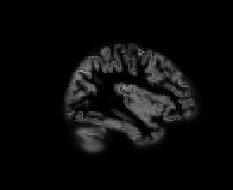

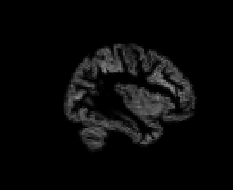

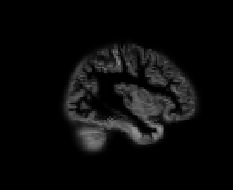

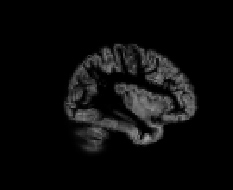

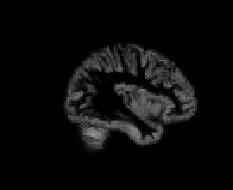

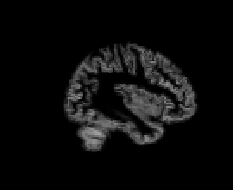

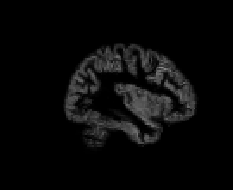

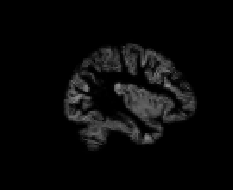

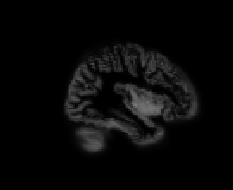

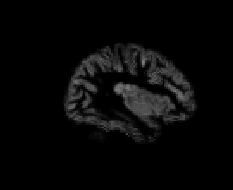

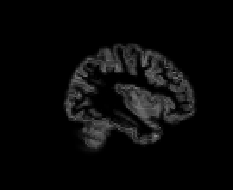

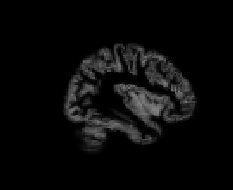

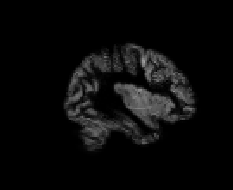

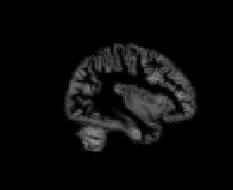

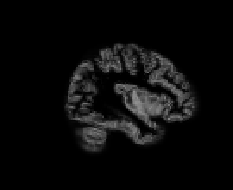

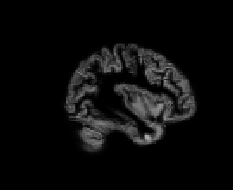

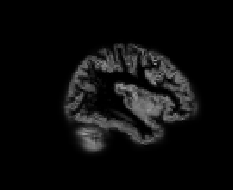

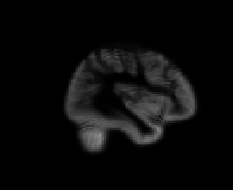

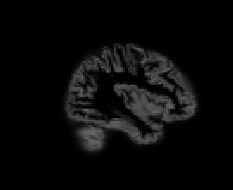

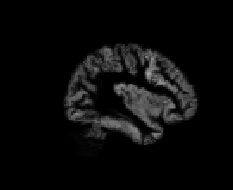

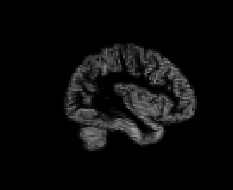

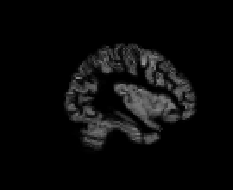

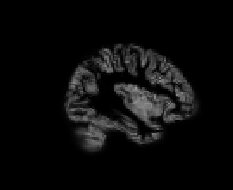

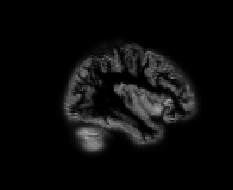

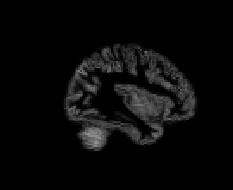

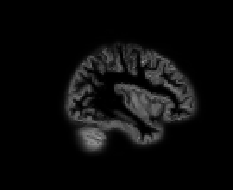

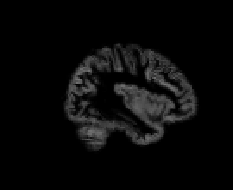

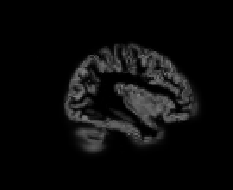

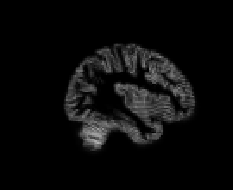

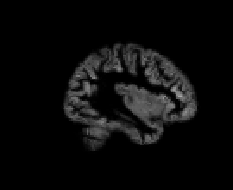

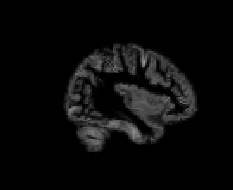

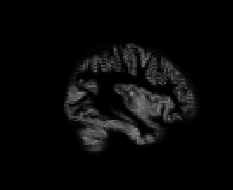

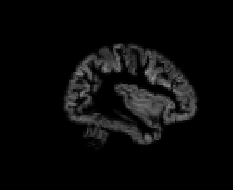

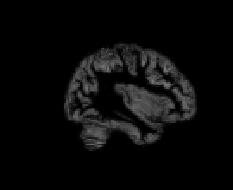

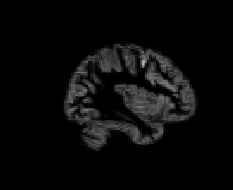

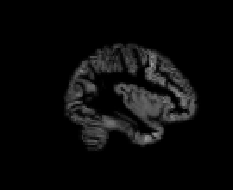

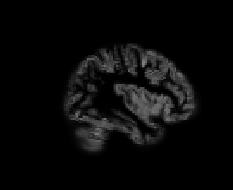

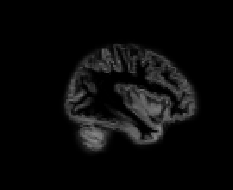

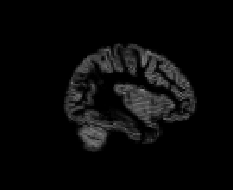

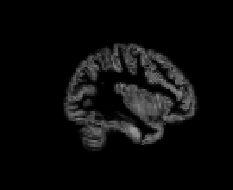

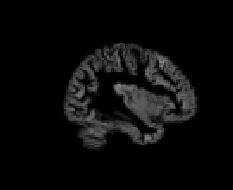

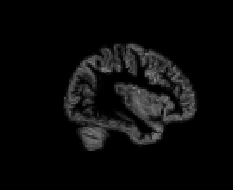

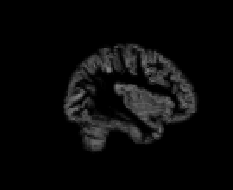

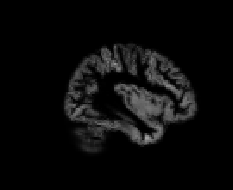

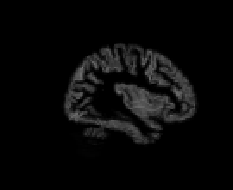

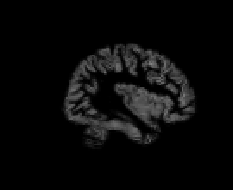

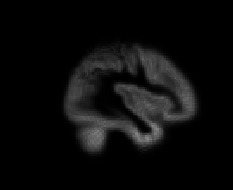

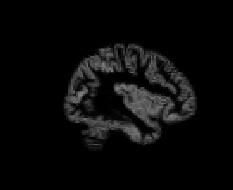

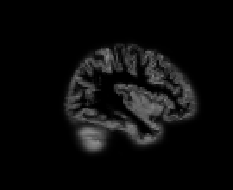

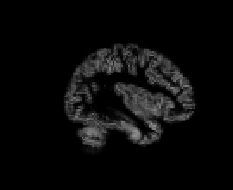

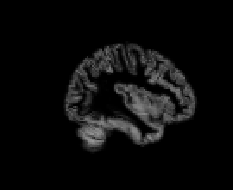

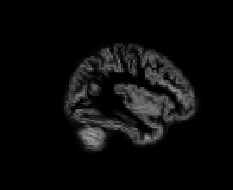

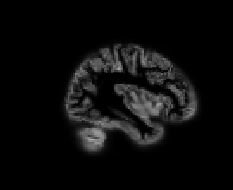

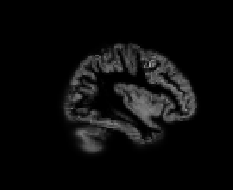

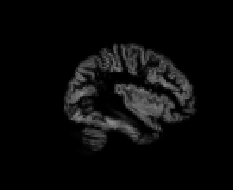

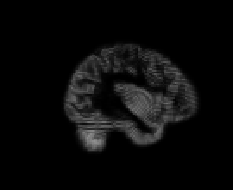

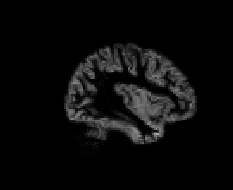

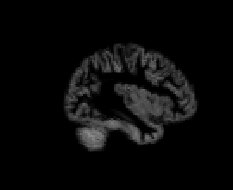

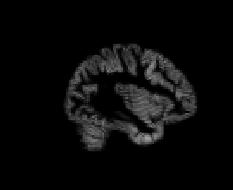

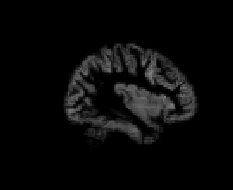

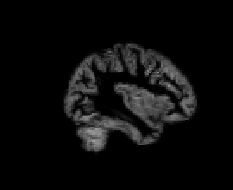

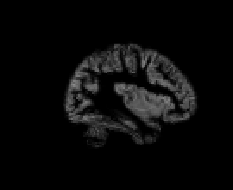

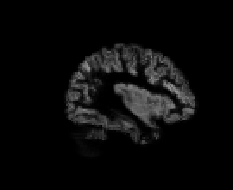

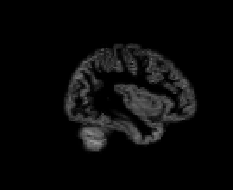

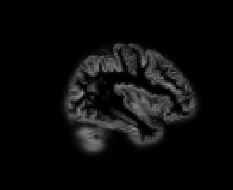

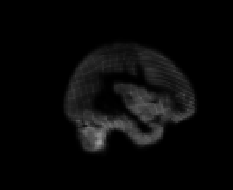

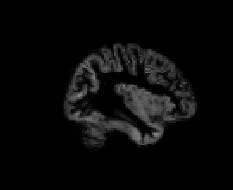

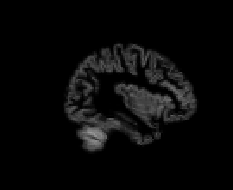

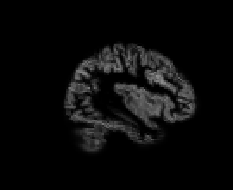

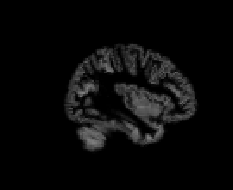

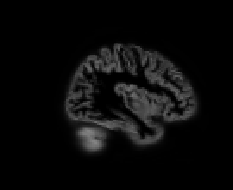

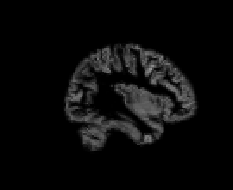

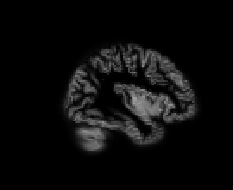

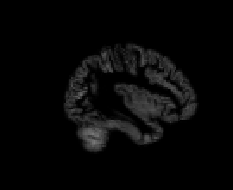

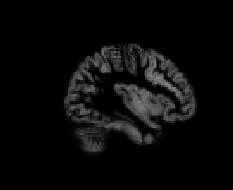

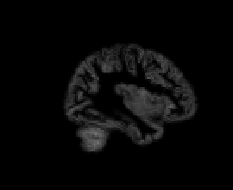

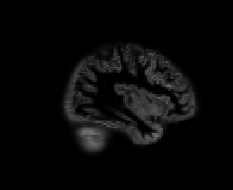

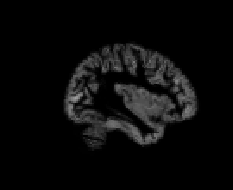

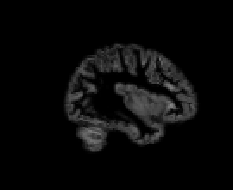

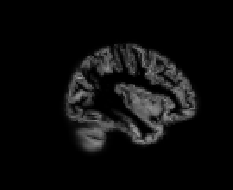

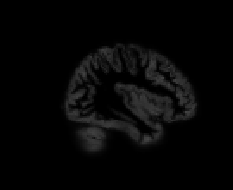

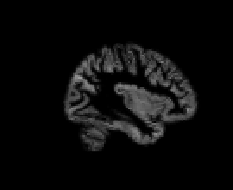

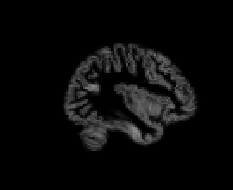

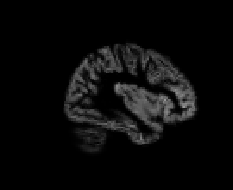

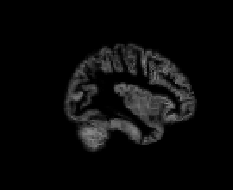

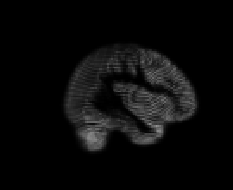

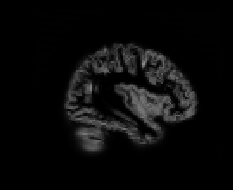

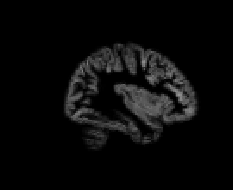

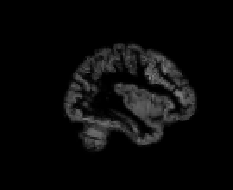

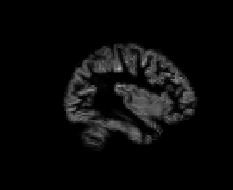

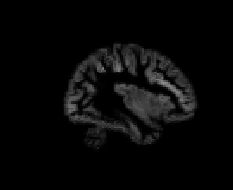

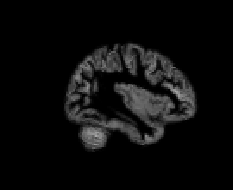

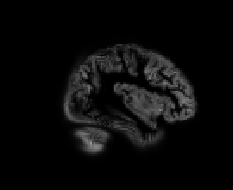

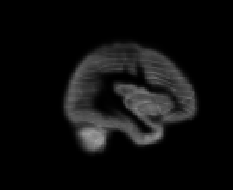

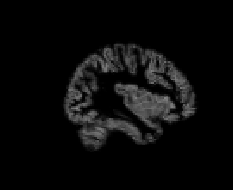

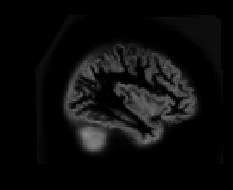

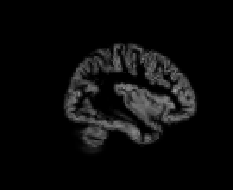

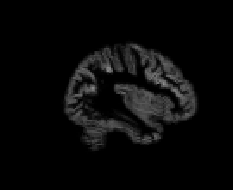

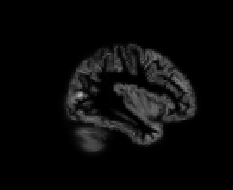

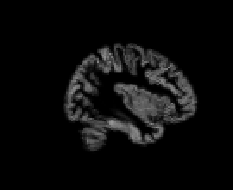

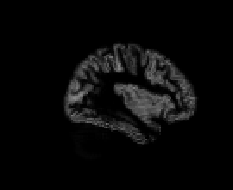

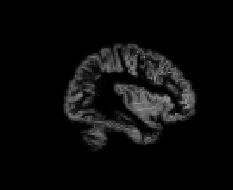

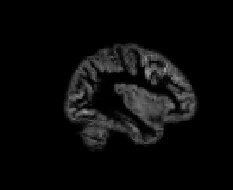

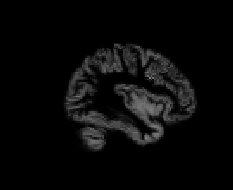

In [13]:
## extract test images from test sets 
      
i = 0
for image in gm_imgs_test:
    fig = plotting.plot_anat(image, display_mode = 'x', annotate= False, cut_coords = [40])
    if cdr_test[i] == 0:
        fig.savefig('C:\\Users\\user\\Neural Networks\\NiDataTest\\not_impaired\\' + 'brain' + str(i) + '.png')
    elif cdr_test[i] == 1:
        fig.savefig('C:\\Users\\user\\Neural Networks\\NiDataTest\\impaired\\' + 'brain' + str(i) + '.png')
    i = i + 1

C:\Users\kimbe\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
C:\Users\kimbe\Anaconda3\lib\site-packages\nilearn\plotting\displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


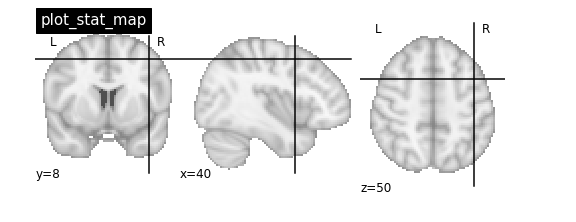

In [58]:
plot1 = plotting.plot_stat_map(img,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[40, 8, 50])
plt.show()

C:\Users\kimbe\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
C:\Users\kimbe\Anaconda3\lib\site-packages\nilearn\plotting\displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


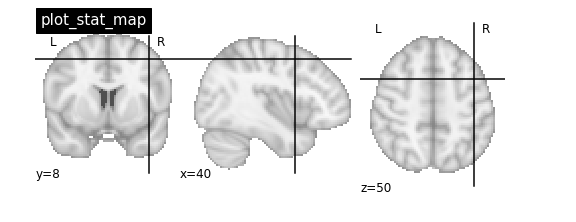

In [59]:
plot1 = plotting.plot_stat_map(img1,
                       threshold=3, title="plot_stat_map",
                       cut_coords=[40, 8, 50])
plt.show()